In [1]:
%matplotlib inline
from ggplot import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv
from pandas import DataFrame
from pymongo import MongoClient, ASCENDING, DESCENDING
from bson.code import Code
from collections import Counter
from collections import defaultdict

client = MongoClient()
anycast = client.anycast_monitoring

a_root = anycast['a_root']
j_root = anycast['j_root']

# A-Root

![alt text](../analysis/figs/png/convergence_over_time_a.png)

1. How many origin ASes are detected over the time? do they remain the same?

In [2]:
reducer = Code("""
    function(obj, prev) {
        prev.origin_as_4.push(obj.path4[obj.path4.length - 1]);
        prev.origin_as_6.push(obj.path6[obj.path6.length - 1]);
    }
"""
)

def dateparse (time_in_secs):    
    return datetime.fromtimestamp(float(time_in_secs))

res = a_root.group(key={'timestamp':1}, condition={}, initial={'origin_as_4': [], 'origin_as_6': []}, reduce=reducer)
res_df = DataFrame(res)

res_df['timestamp'] = pd.to_datetime(res_df['timestamp'] * 1000000000)
res_df = res_df.set_index(['timestamp'])

res_df

,origin_as_4,origin_as_6
timestamp,,
2008-05-01,"[11840.0, 11840.0]","[26415.0, 26415.0]"
2008-07-01,"[11840.0, 11840.0, 11840.0]","[26415.0, 26415.0, 26415.0]"
2009-03-01,"[26415.0, 26415.0, 26415.0, 26415.0]","[26415.0, 26415.0, 26415.0, 26415.0]"
2009-07-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-08-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-09-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-10-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-11-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-12-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."


In [3]:
for item in res_df.iterrows():
    print(item[0])
    origin_as_4 = Counter(item[1]['origin_as_4'])
    origin_as_6 = Counter(item[1]['origin_as_6'])
    print('\tIPv4: {}'.format(origin_as_4))
    print('\tIPv6: {}'.format(origin_as_6))

2008-05-01 00:00:00
	IPv4: Counter({11840.0: 2})
	IPv6: Counter({26415.0: 2})
2008-07-01 00:00:00
	IPv4: Counter({11840.0: 3})
	IPv6: Counter({26415.0: 3})
2009-03-01 00:00:00
	IPv4: Counter({26415.0: 4})
	IPv6: Counter({26415.0: 4})
2009-07-01 00:00:00
	IPv4: Counter({26415.0: 25})
	IPv6: Counter({26415.0: 25})
2009-08-01 00:00:00
	IPv4: Counter({26415.0: 25})
	IPv6: Counter({26415.0: 25})
2009-09-01 00:00:00
	IPv4: Counter({26415.0: 26})
	IPv6: Counter({26415.0: 26})
2009-10-01 00:00:00
	IPv4: Counter({26415.0: 25})
	IPv6: Counter({26415.0: 25})
2009-11-01 00:00:00
	IPv4: Counter({26415.0: 25})
	IPv6: Counter({26415.0: 25})
2009-12-01 00:00:00
	IPv4: Counter({26415.0: 27})
	IPv6: Counter({26415.0: 27})
2010-01-01 00:00:00
	IPv4: Counter({26415.0: 15})
	IPv6: Counter({26415.0: 15})
2010-02-01 00:00:00
	IPv4: Counter({26415.0: 25})
	IPv6: Counter({26415.0: 25})
2010-03-01 00:00:00
	IPv4: Counter({26415.0: 27})
	IPv6: Counter({26415.0: 27})
2010-04-01 00:00:00
	IPv4: Counter({26415.0: 2

## plot it

Firstly, find unique origin ASes first

In [4]:
# find unique value of origin AS. This is very inefficient
unique_origin_4 = set()
unique_origin_6 = set()

for item in res_df.iterrows():
    for asn in item[1]['origin_as_4']:
        unique_origin_4.add(asn)
    for asn in item[1]['origin_as_6']:
        unique_origin_6.add(asn)

print('unique4: {}'.format(unique_origin_4))
print('unique6: {}'.format(unique_origin_6))

unique4: {11840.0, 36619.0, 36620.0, 36621.0, 36622.0, 26415.0, 36625.0, 64820.0, 36631.0}
unique6: {36616.0, 36617.0, 36618.0, 36619.0, 36620.0, 36622.0, 26415.0, 36624.0, 36623.0, 36625.0, 36627.0, 36629.0, 36631.0, 36632.0}


In [5]:
x = [dt for dt in res_df.index]

y_4 = defaultdict(list)
y_6 = defaultdict(list)

# True value 
#
for item in res_df.iterrows():
    origin_as_4 = Counter(item[1]['origin_as_4'])
    origin_as_6 = Counter(item[1]['origin_as_6'])
    
    for unique4 in unique_origin_4:
        if unique4 in origin_as_4:
            y_4[unique4].append(origin_as_4[unique4])
        else:
            y_4[unique4].append(0)

    for unique6 in unique_origin_6:
        if unique6 in origin_as_6:
            y_6[unique6].append(origin_as_6[unique6])
        else:
            y_6[unique6].append(0)


# Relative value 

# for item in res_df.iterrows():
#     origin_as_4 = Counter(item[1]['origin_as_4'])
#     origin_as_6 = Counter(item[1]['origin_as_6'])
    
#     for unique4 in unique_origin_4:
#         if unique4 in origin_as_4:
#             val = origin_as_4[unique4] / len(item[1]['origin_as_4'])
# #             y_4[unique4].append(origin_as_4[unique4])
#             y_4[unique4].append(val)
#         else:
#             y_4[unique4].append(0)

#     for unique6 in unique_origin_6:
#         if unique6 in origin_as_6:
# #             y_6[unique6].append(origin_as_6[unique6])
#             val = origin_as_6[unique6] / len(item[1]['origin_as_6'])
#             y_6[unique6].append(val)
#         else:
#             y_6[unique6].append(0)


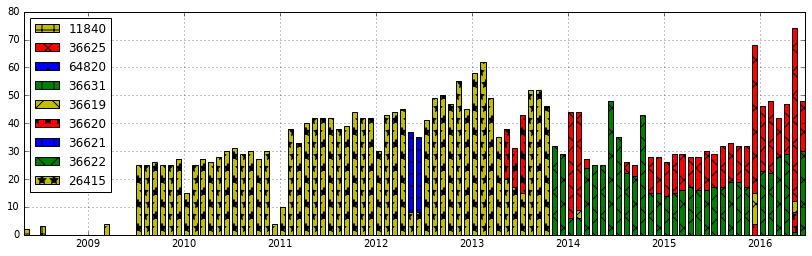

In [6]:
from itertools import cycle

color = ['y', 'r', 'b', 'g']
hatch = ['+', 'x', '*']
color_cycler = cycle(color)
hatch_cycler = cycle(hatch)

fig, ax = plt.subplots(figsize=(14,4))

# ipv4 first
for item in y_4:
    plt.bar(x, y_4[item], width=20, color=next(color_cycler), hatch=next(hatch_cycler), label=str(item).split('.')[0])
    
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

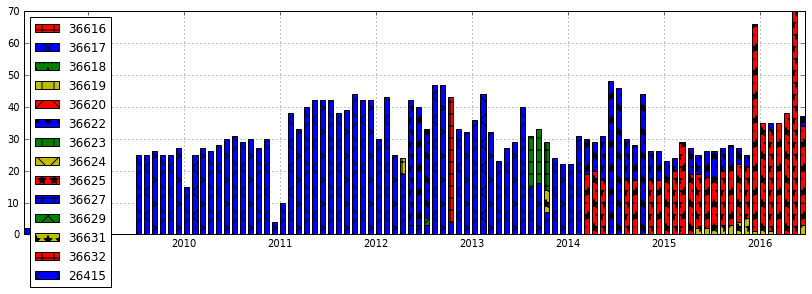

In [7]:
fig, ax = plt.subplots(figsize=(14,4))

for item in y_6:
    plt.bar(x, y_6[item], width=20, color=next(color_cycler), hatch=next(hatch_cycler), label=str(item).split('.')[0])
    
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Since when A-Root started using different origin ASes?

In [17]:
for item in res_df.iterrows():
    u4 = set()  # removes duplicate
    u6 = set()  # removes duplicate
    for asn in item[1]['origin_as_4']:
        u4.add(asn)
    for asn in item[1]['origin_as_6']:
        u6.add(asn)
    print('{}\n\t\tIPv4: {} \n\t\tIPv6: {}'.format(item[0], sorted(list(u4)), sorted(list(u6))))

2008-05-01 00:00:00
		IPv4: [11840.0] 
		IPv6: [26415.0]
2008-07-01 00:00:00
		IPv4: [11840.0] 
		IPv6: [26415.0]
2009-03-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-07-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-08-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-09-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-10-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-11-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2009-12-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-01-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-02-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-03-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-04-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-05-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-06-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-07-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-08-01 00:00:00
		IPv4: [26415.0] 
		IPv6: [26415.0]
2010-09-01 00:00:00
		IPv4: [26

*Answer*: beginning of 2012

# J-Root

In [14]:
resj = j_root.group(key={'timestamp':1}, condition={}, initial={'origin_as_4': [], 'origin_as_6': []}, reduce=reducer)
resj_df = DataFrame(resj)

resj_df['timestamp'] = pd.to_datetime(resj_df['timestamp'] * 1000000000)
resj_df = resj_df.set_index(['timestamp'])

resj_df

,origin_as_4,origin_as_6
timestamp,,
2008-03-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2008-05-01,[26415.0],[26415.0]
2008-07-01,"[26415.0, 26415.0, 26415.0, 26415.0]","[26415.0, 26415.0, 26415.0, 26415.0]"
2009-03-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-07-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-08-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-09-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-10-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."
2009-11-01,"[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ...","[26415.0, 26415.0, 26415.0, 26415.0, 26415.0, ..."


## when J-Root started using different origin ASes?

In [15]:
for item in resj_df.iterrows():
    u4 = set()
    u6 = set()
    for asn in item[1]['origin_as_4']:
        u4.add(asn)
    for asn in item[1]['origin_as_6']:
        u6.add(asn)
    print('{}\n\t\tIPv4: {} \n\t\tIPv6: {}'.format(item[0], u4, u6))

2008-03-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2008-05-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2008-07-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-03-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-07-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-08-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-09-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-10-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2009-11-01 00:00:00
		IPv4: {9246.0, 26415.0} 
		IPv6: {26415.0}
2009-12-01 00:00:00
		IPv4: {9246.0, 26415.0} 
		IPv6: {26415.0}
2010-01-01 00:00:00
		IPv4: {36617.0, 26415.0} 
		IPv6: {26415.0}
2010-02-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-03-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-04-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-05-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-06-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-07-01 00:00:00
		IPv4: {26415.0} 
		IPv6: {26415.0}
2010-0

*Answer*: beginning of 2012. Similar to A-Root. Coincidence? I don't think so.

Notice that they use the same origin ASes